In [33]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = (500, 300)
from rdkit.Chem import Draw
from kartograf import SmallMoleculeComponent
from kartograf.atom_aligner import align_mol_shape, align_mol_skeletons
from kartograf import KartografAtomMapper
from kartograf.atom_mapping_scorer import MappingRMSDScorer, MappingShapeOverlapScorer
from kartograf.utils.mapping_visualization_widget import display_mappings_3d

In [34]:
# definitions
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

In [35]:
df = pd.read_pickle('/Users/kate_fieseler/PycharmProjects/syndirella/syndirella/tests/vectors/BHKVBKDDVLQZCR-UHFFFAOYSA-N_3ADBvA_to_hippo.pkl.gz')
df

,base_compound_smiles,1_reaction,1_r1_smiles,1_r2_smiles,1_r_previous_product,1_product_smiles,1_product_name,1_num_atom_diff,1_flag,2_reaction,...,3_flag,3_stereoisomer,error,∆∆G,∆G_bound,∆G_unbound,comRMSD,regarded,path_to_mol,intra_geometry_pass
0,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,O=C(O)C1CCCO1,CC(C)(C)OC(=O)Nc1cccc(N)c1,None,CC(C)(C)OC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,BHKVBKDDVLQZCR-UHFFFAOYSA-N-eb2Mvx-1,None,None,N-Boc_deprotection,...,None,A,,-22.720858,383.470848,406.191706,0.553939,"[A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1, A7...",/data/xchem-fragalysis/kfieseler/A71EV2A_run4/...,True
1,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,O=C(O)C1CCCO1,CC1(C)CN(c2cccc(N)c2)C(=O)O1,None,CC1(C)CN(c2cccc(NC(=O)C3CCCO3)c2)C(=O)O1,BHKVBKDDVLQZCR-UHFFFAOYSA-N-eb2Mvx-2,None,None,N-Boc_deprotection,...,None,A,,-22.720858,383.470848,406.191706,0.553939,"[A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1, A7...",/data/xchem-fragalysis/kfieseler/A71EV2A_run4/...,True
2,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,O=C(O)C1CCCO1,CC(C)(C)OC(=O)Nc1cccc(N)c1,None,CC(C)(C)OC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,BHKVBKDDVLQZCR-UHFFFAOYSA-N-eb2Mvx-1,None,None,N-Boc_deprotection,...,None,B,,-23.505138,385.884760,409.389898,0.632163,"[A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1, A7...",/data/xchem-fragalysis/kfieseler/A71EV2A_run4/...,True
3,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,O=C(O)C1CCCO1,CC1(C)CN(c2cccc(N)c2)C(=O)O1,None,CC1(C)CN(c2cccc(NC(=O)C3CCCO3)c2)C(=O)O1,BHKVBKDDVLQZCR-UHFFFAOYSA-N-eb2Mvx-2,None,None,N-Boc_deprotection,...,None,B,,-23.505138,385.884760,409.389898,0.632163,"[A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1, A7...",/data/xchem-fragalysis/kfieseler/A71EV2A_run4/...,True
4,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,O=C(O)C1CCCO1,CC(C)(C)OC(=O)Nc1ccc(O)c(N)c1,None,CC(C)(C)OC(=O)Nc1ccc(O)c(NC(=O)C2CCCO2)c1,BHKVBKDDVLQZCR-UHFFFAOYSA-N-eb2Mvx-23,None,None,N-Boc_deprotection,...,None,A,,-50.093752,387.081530,437.175283,0.554922,"[A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1, A7...",/data/xchem-fragalysis/kfieseler/A71EV2A_run4/...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13040,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,CC1CCC(C(=O)O)O1,Cc1ccc(NC(=O)OC(C)(C)C)cc1N,None,Cc1ccc(NC(=O)OC(C)(C)C)cc1NC(=O)C1CCC(C)O1,BHKVBKDDVLQZCR-UHFFFAOYSA-N-eb2Mvx-132,None,None,N-Boc_deprotection,...,None,B,,-39.607626,534.560168,574.167795,0.841773,"[A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1, A7...",/data/xchem-fragalysis/kfieseler/A71EV2A_run4/...,True
13041,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,CC1CCC(C(=O)O)O1,Cc1ccc(NC(=O)OC(C)(C)C)cc1N,None,Cc1ccc(NC(=O)OC(C)(C)C)cc1NC(=O)C1CCC(C)O1,BHKVBKDDVLQZCR-UHFFFAOYSA-N-eb2Mvx-132,None,None,N-Boc_deprotection,...,None,C,,-15.046741,434.889217,449.935958,0.600600,"[A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1, A7...",/data/xchem-fragalysis/kfieseler/A71EV2A_run4/...,True
13042,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,CC1CCC(C(=O)O)O1,Cc1ccc(NC(=O)OC(C)(C)C)cc1N,None,Cc1ccc(NC(=O)OC(C)(C)C)cc1NC(=O)C1CCC(C)O1,BHKVBKDDVLQZCR-UHFFFAOYSA-N-eb2Mvx-132,None,None,N-Boc_deprotection,...,None,D,,-7.433983,489.373608,496.807591,0.706762,"[A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1, A7...",/data/xchem-fragalysis/kfieseler/A71EV2A_run4/...,True
13043,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,CC1CCC(C(=O)O)O1,Cc1ccc(NC(=O)OC(C)(C)C)cc1N,None,Cc1ccc(NC(=O)OC(C)(C)C)cc1NC(=O)C1CCC(C)O1,BHKVBKDDVLQZCR-UHFFFAOYSA-N-eb2Mvx-132,None,None,N-Boc_deprotection,...,None,A,,-59.881219,480.041054,539.922272,0.655331,"[A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1, A7...",/data/xchem-fragalysis/kfieseler/A71EV2A_run4/...,True


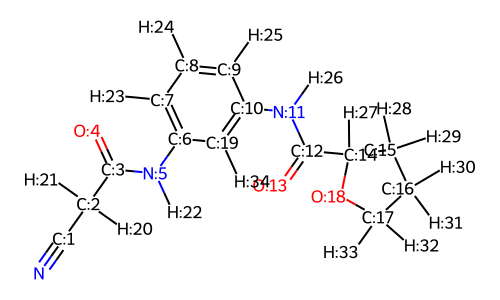

In [36]:
# look at base compound and atom indicies
base_mol = Chem.AddHs(Chem.MolFromSmiles(df['base_compound_smiles'][0]), addCoords=True)
mol_with_atom_index(base_mol)

In [37]:
# embed for kartograf
base_mol = Chem.AddHs(Chem.MolFromSmiles(df['base_compound_smiles'][0]), addCoords=True)
Chem.rdDistGeom.EmbedMolecule(base_mol, useRandomCoords=False, randomSeed=0)
base_smc = SmallMoleculeComponent.from_rdkit(base_mol)

In [38]:
# make example dictionary of bad expansions, anything off of the tetrahydrofuran ring
expansions = {
    15: 'BAD',
    16: 'BAD',
    17: 'BAD',
    18: 'BAD',
}

In [39]:
# get random elaboration row
row = df[df['intra_geometry_pass'] == True].sample(1)
row

,base_compound_smiles,1_reaction,1_r1_smiles,1_r2_smiles,1_r_previous_product,1_product_smiles,1_product_name,1_num_atom_diff,1_flag,2_reaction,...,3_flag,3_stereoisomer,error,∆∆G,∆G_bound,∆G_unbound,comRMSD,regarded,path_to_mol,intra_geometry_pass
9663,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,O=C(O)C1CCCO1,CC(C)(C)OC(=O)Nc1cccc(N)c1,None,CC(C)(C)OC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,BHKVBKDDVLQZCR-UHFFFAOYSA-N-eb2Mvx-1,None,None,N-Boc_deprotection,...,None,A,,-6.849753,432.701345,439.551097,0.960455,"[A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1, A7...",/data/xchem-fragalysis/kfieseler/A71EV2A_run4/...,True


# Mapping to intermediate products

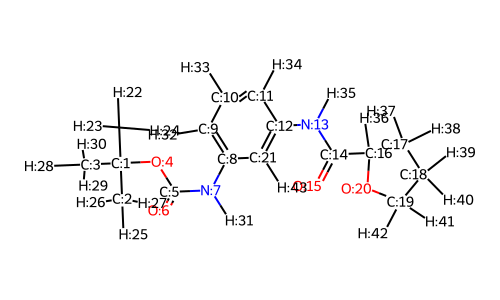

In [40]:
# first step
mol_product = Chem.AddHs(Chem.MolFromSmiles(row['1_product_smiles'].values[0]), addCoords=True)
mol_with_atom_index(mol_product)

In [41]:
# build small molecule components
mol_product = Chem.AddHs(Chem.MolFromSmiles(row['1_product_smiles'].values[0]), addCoords=True)
Chem.rdDistGeom.EmbedMolecule(mol_product, useRandomCoords=False, randomSeed=0)
product = SmallMoleculeComponent.from_rdkit(mol_product)

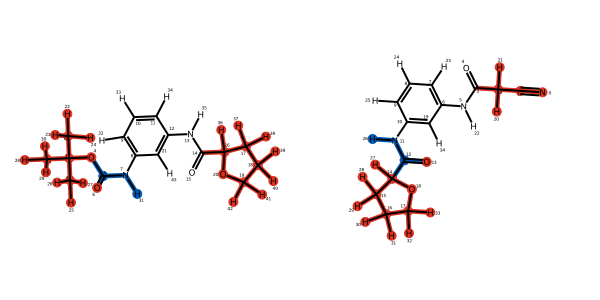

In [42]:
# Align product to base compound
product_align_base = align_mol_shape(base_smc, ref_mol=product)
# Get mapping
mapper = KartografAtomMapper(atom_map_hydrogens=True)
kartograf_mapping = next(mapper.suggest_mappings(product, product_align_base))
kartograf_mapping

In [43]:
# Score mapping
rmsd_scorer = MappingRMSDScorer()
score = rmsd_scorer(mapping=kartograf_mapping)
score

0.5320023735065691

In [44]:
# Score mapping with shape overlay
shape_scorer = MappingShapeOverlapScorer()
shape_score = shape_scorer(mapping=kartograf_mapping)
shape_score

0.42284852106083104

In [64]:
display_mappings_3d(kartograf_mapping)

## OUTCOME: Difficult. 

# Mapping to original reactants step 1

## check r1

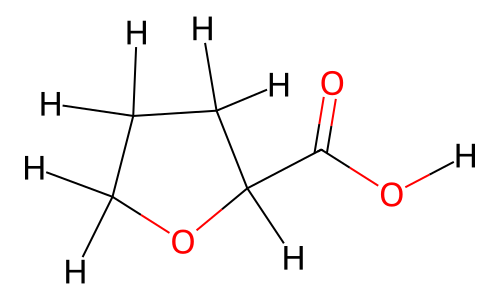

In [46]:
# first step reactants
r1_mol = Chem.AddHs(Chem.MolFromSmiles(df['1_r1_smiles'][0]), addCoords=True)
r1_mol

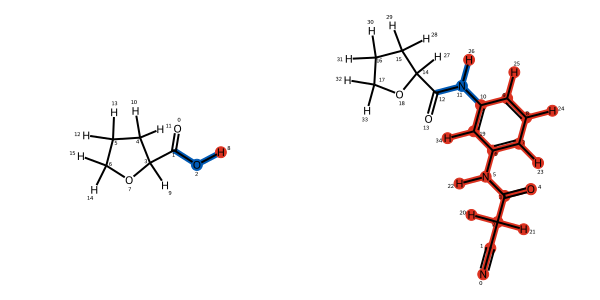

In [47]:
# make mapping of original reactant to base
Chem.rdDistGeom.EmbedMolecule(r1_mol, useRandomCoords=False, randomSeed=64)
r1_smc = SmallMoleculeComponent.from_rdkit(r1_mol)
# Align product to base compound
r1_alignBase = align_mol_skeletons(base_smc, ref_mol=r1_smc)
# Get mapping
mapper = KartografAtomMapper(atom_map_hydrogens=True, atom_max_distance=1.5)
kartograf_mapping = next(mapper.suggest_mappings(r1_smc, r1_alignBase))
kartograf_mapping

In [48]:
# Score mapping
rmsd_scorer = MappingRMSDScorer()
score = rmsd_scorer(mapping=kartograf_mapping)
score

0.34801757226840135

In [49]:
# Score mapping with shape overlay
shape_scorer = MappingShapeOverlapScorer()
shape_score = shape_scorer(mapping=kartograf_mapping)
shape_score

0.5199191224661194

In [ ]:
display_mappings_3d(kartograf_mapping)

## check r2

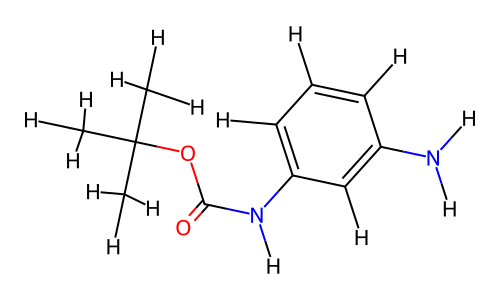

In [51]:
r2_mol = Chem.AddHs(Chem.MolFromSmiles(df['1_r2_smiles'][0]), addCoords=True)
r2_mol

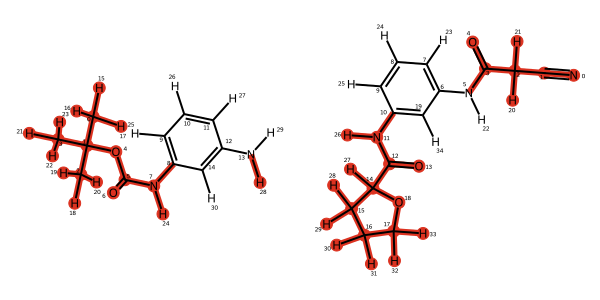

In [52]:
# make mapping of original reactant to base
Chem.rdDistGeom.EmbedMolecule(r2_mol, useRandomCoords=False, randomSeed=64)
r2_smc = SmallMoleculeComponent.from_rdkit(r2_mol)
# Align product to base compound
r2_alignBase = align_mol_skeletons(base_smc, ref_mol=r2_smc) # works best if larger molecule is aligned to smaller one
# Get mapping
mapper = KartografAtomMapper(atom_map_hydrogens=True, atom_max_distance=1.5)
kartograf_mapping = next(mapper.suggest_mappings(r2_smc, r2_alignBase))
kartograf_mapping

In [53]:
# Score mapping
rmsd_scorer = MappingRMSDScorer()
score = rmsd_scorer(mapping=kartograf_mapping)
score

0.27161028124009534

In [54]:
# Score mapping with shape overlay
shape_scorer = MappingShapeOverlapScorer()
shape_score = shape_scorer(mapping=kartograf_mapping)
shape_score

0.510868452060162

In [66]:
display_mappings_3d(kartograf_mapping)

Would work a lot better if I could give it an already atom mapped pair.

Options: Could reject mapping if the RMSD is high enough (>0.80) and just not to try to throw out reactants... Because we want to never have false positives of matching since that could throw out some good elaborations

# Check step 2

## check r1

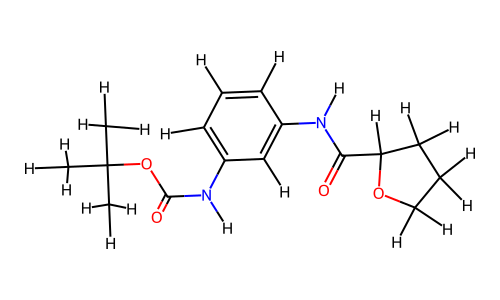

In [56]:
r1_mol = Chem.AddHs(Chem.MolFromSmiles(df['2_r1_smiles'][0]), addCoords=True)
r1_mol

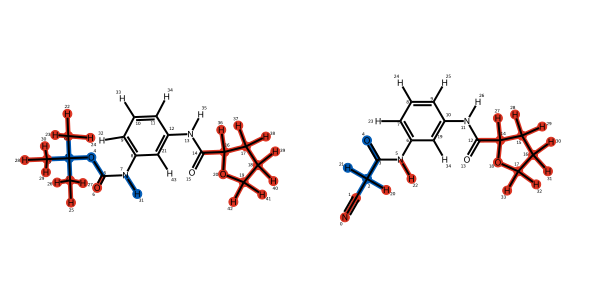

In [57]:
# make mapping of original reactant to base
Chem.rdDistGeom.EmbedMolecule(r1_mol, useRandomCoords=False, randomSeed=64)
r1_smc = SmallMoleculeComponent.from_rdkit(r1_mol)
# Align product to base compound
r1_alignBase = align_mol_skeletons(base_smc, ref_mol=r1_smc)
# Get mapping
mapper = KartografAtomMapper(atom_map_hydrogens=True, atom_max_distance=1.5)
kartograf_mapping = next(mapper.suggest_mappings(r1_smc, r1_alignBase))
kartograf_mapping

In [58]:
# Score mapping
rmsd_scorer = MappingRMSDScorer()
score = rmsd_scorer(mapping=kartograf_mapping)
score
# Score mapping with shape overlay
shape_scorer = MappingShapeOverlapScorer()
shape_score = shape_scorer(mapping=kartograf_mapping)
shape_score
print(f'RMSD: {score}, Shape: {shape_score}')

RMSD: 0.1860222205433232, Shape: 0.5404511478181412


In [59]:
display_mappings_3d(kartograf_mapping)

# Check step 3

## check r1

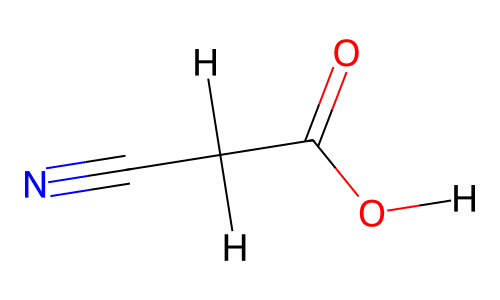

In [60]:
r1_mol = Chem.AddHs(Chem.MolFromSmiles(df['3_r1_smiles'][0]), addCoords=True)
r1_mol

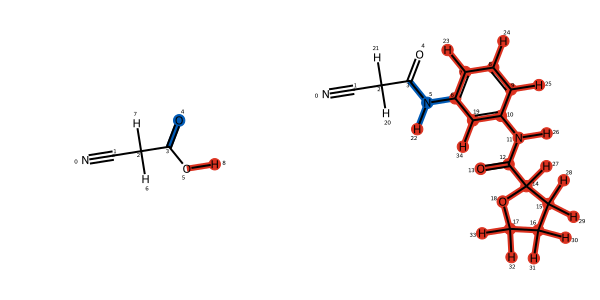

In [61]:
# make mapping of original reactant to base
Chem.rdDistGeom.EmbedMolecule(r1_mol, useRandomCoords=False, randomSeed=64)
r1_smc = SmallMoleculeComponent.from_rdkit(r1_mol)
# Align product to base compound
r1_alignBase = align_mol_skeletons(base_smc, ref_mol=r1_smc)
# Get mapping
mapper = KartografAtomMapper(atom_map_hydrogens=True, atom_max_distance=1.5)
kartograf_mapping = next(mapper.suggest_mappings(r1_smc, r1_alignBase))
kartograf_mapping

In [62]:
# Score mapping
rmsd_scorer = MappingRMSDScorer()
score = rmsd_scorer(mapping=kartograf_mapping)
score
# Score mapping with shape overlay
shape_scorer = MappingShapeOverlapScorer()
shape_score = shape_scorer(mapping=kartograf_mapping)
shape_score
print(f'RMSD: {score}, Shape: {shape_score}')

RMSD: 0.5298559585402856, Shape: 0.6006421998935835


In [63]:
display_mappings_3d(kartograf_mapping)

## TAKEAWAYS:
- Symmetrical molecules are hard to map
- RMSD might not be the best metric to compare against. If the mapping only maps a few atoms that might usually mean the RMSD is artificially low.
- align_mol_skeletons might be better than align_mol_shape since it uses MCS to align the molecules. And since we are literally just elaborating superstructures that might be better.
- Would be simplest to implement filtering after superstructure search of reactants. But also need to implement after pickle storage. 

## HOW TO TEST:
- Need to check how often the correct mapping from the reactant to the base compound is found.
- Could do this with 5 examples of base compounds (what I sent to Jenna), generate 10 mappings for each by different random seeds to find 3D coordinates, compute Jaccard similarity between the correct mapping and the found mapping. Show distribution of Jaccard similarity.